## Libraries and Settings

In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/DataAnalyticsLN/Exploratory Data Analysis (EDA)


## Univariate non graphical exploratory data analysis (EDA)

### Importing the combined data

In [3]:
#Read and select variables
df_orig = pd.read_csv('combined.csv')[['country_name','year','gdp','total_refugees']]

#Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

#Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,country_name,year,gdp,total_refugees
0,France,2001,1.370377e+12,6036
1,France,2002,1.492428e+12,5947
2,France,2003,1.835096e+12,5539
3,France,2004,2.109792e+12,5788
4,France,2005,2.192146e+12,5912


### Quantiles original values

In [4]:
df_orig[['gdp', 'total_refugees']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.95]).round(2)


,gdp,total_refugees
0.05,1.996427e+11,111.85
0.10,2.300326e+11,1049.70
0.25,4.361440e+11,7375.25
0.50,1.489998e+12,42595.50
0.75,2.811134e+12,102212.00
0.95,1.595956e+13,320019.30


### Filter something

### Shape (number of rows and columns)

In [5]:
print(df_orig.shape)

(230, 4)


### Data types

In [6]:
df_orig.dtypes

country_name       object
year                int64
gdp               float64
total_refugees      int64
dtype: object

### Summary statistics of numeric variables

In [7]:
df_orig.describe()

,year,gdp,total_refugees
count,230.000000,2.300000e+02,2.300000e+02
mean,2012.000000,3.070335e+12,1.111135e+05
std,6.647717,5.057671e+12,2.675771e+05
min,2001.000000,1.216041e+11,1.500000e+01
25%,2006.000000,4.361440e+11,7.375250e+03
50%,2012.000000,1.489998e+12,4.259550e+04
75%,2018.000000,2.811134e+12,1.022120e+05
max,2023.000000,2.772071e+13,2.454276e+06


### Statistical measures (min, max, mead, median, count) for selected variables

In [8]:
#GDP
print('GDP:',
      'Count:', round(df_orig.gdp.count(), 1),
      'Min:', round(df_orig.gdp.min(), 1),
      'Max:', round(df_orig.gdp.max(), 1),
      'Mean:', round(df_orig.gdp.mean(), 1),
      'Median:', round(df_orig.gdp.median(), 1),
      'Std:', round(df_orig.gdp.std(), 1))

# Refugees
print('Refugees:',
      'Count:', round(df_orig.total_refugees.count(), 1),
      'Min:', round(df_orig.total_refugees.min(), 1),
      'Max:', round(df_orig.total_refugees.max(), 1),
      'Mean:', round(df_orig.total_refugees.mean(), 1),
      'Median:', round(df_orig.total_refugees.median(), 1),
      'Std:', round(df_orig.total_refugees.std(), 1))

GDP: Count: 230 Min: 121604107165.0 Max: 27720709000000.0 Mean: 3070334614603.1 Median: 1489998207811.8 Std: 5057671121604.9
Refugees: Count: 230 Min: 15 Max: 2454276 Mean: 111113.5 Median: 42595.5 Std: 267577.1


### Skewness

In [9]:
df_orig[['gdp', 'total_refugees']].skew()

gdp               2.872484
total_refugees    5.717763
dtype: float64

### Kurtosis

In [10]:
df_orig[['gdp', 'total_refugees']].kurtosis()

gdp                7.898314
total_refugees    38.940207
dtype: float64

### Extreme values

In [11]:
# low gdp
df_orig[df_orig['gdp']<=150000000000]

,country_name,year,gdp,total_refugees
46,Greece,2001,1.320505e+11,6101
92,Portugal,2001,1.216041e+11,83
93,Portugal,2002,1.347956e+11,78


In [18]:
# low refugees
df_orig[df_orig['total_refugees']<=100]

,country_name,year,gdp,total_refugees
92,Portugal,2001,1.216041e+11,83
93,Portugal,2002,1.347956e+11,78
94,Portugal,2003,1.652262e+11,54
95,Portugal,2004,1.893821e+11,54
96,Portugal,2005,1.972539e+11,37
97,Portugal,2006,2.087564e+11,15
98,Portugal,2007,2.404961e+11,32
99,Portugal,2008,2.634164e+11,46
100,Portugal,2009,2.446678e+11,56
101,Portugal,2010,2.384439e+11,39


In [13]:
# high gdp
df_orig[df_orig['gdp']>=15000000000000]

,country_name,year,gdp,total_refugees
239,United States,2010,1.504897e+13,22230
240,United States,2011,1.559973e+13,20635
241,United States,2012,1.625397e+13,20598
242,United States,2013,1.688068e+13,26453
243,United States,2014,1.760814e+13,33962
244,United States,2015,1.829502e+13,42075
245,United States,2016,1.880491e+13,50139
246,United States,2017,1.961210e+13,58519
247,United States,2018,2.065652e+13,63492
248,United States,2019,2.153998e+13,67406


In [19]:
# high refugees
df_orig[df_orig['total_refugees']>=1000000]

,country_name,year,gdp,total_refugees
39,Germany,2017,3.763092e+12,1044943
40,Germany,2018,4.052008e+12,1070655
41,Germany,2019,3.957208e+12,1095077
42,Germany,2020,3.940143e+12,1106057
43,Germany,2021,4.348297e+12,1156549
44,Germany,2022,4.163596e+12,1998968
45,Germany,2023,4.525704e+12,2454276


### Get a list of categories of categorical variable - BEARBEITEN

In [14]:
## das stimmt nicht
np.array(pd.Categorical(df_orig['country_name']).categories)

array(['France', 'Germany', 'Greece', 'Italy', 'Portugal', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

## Multivariate non graphical exploratory data analysis (EDA)

### Cross-tabulation

In [27]:
cross_tab = pd.crosstab(
    index=df_orig['country_name'],
    columns=df_orig['year'],
    values=df_orig['total_refugees'],
    aggfunc='sum'
)

#Display the cross tab
print(cross_tab)

year             2001    2002    2003    2004    2005    2006    2007    2008  \
country_name                                                                    
France           6036    5947    5539    5788    5912    6084    6336   13674   
Germany         20228  277159  260911  234892  213628  115789  118980  276830   
Greece           6101    3194    4996    7945    6860    6189    7196    9112   
Italy            1981    2251    2310    3068    3453    4135    6230   16334   
Portugal           83      78      54      54      37      15      32      46   
Spain             834     860     700     719     655     632    1190    1236   
Sweden          37099   45735   44830   41186   36327   42617  100182   97312   
Switzerland      8830    9469    9465    8369    8208    9552   19400   24400   
United Kingdom  35415   50965   57893   59990   61285   62379   63883  126052   
United States   98229   98324  100479   94777   85318  155551   59514   55744   

year              2009    2

### Pivot tables

In [28]:

pivot_table = pd.pivot_table(
    df_orig,
    values='total_refugees', 
    index='country_name', 
    columns='year', 
    aggfunc='sum',
    fill_value=0
)

# Display the pivot table
print(pivot_table)

year             2001    2002    2003    2004    2005    2006    2007    2008  \
country_name                                                                    
France           6036    5947    5539    5788    5912    6084    6336   13674   
Germany         20228  277159  260911  234892  213628  115789  118980  276830   
Greece           6101    3194    4996    7945    6860    6189    7196    9112   
Italy            1981    2251    2310    3068    3453    4135    6230   16334   
Portugal           83      78      54      54      37      15      32      46   
Spain             834     860     700     719     655     632    1190    1236   
Sweden          37099   45735   44830   41186   36327   42617  100182   97312   
Switzerland      8830    9469    9465    8369    8208    9552   19400   24400   
United Kingdom  35415   50965   57893   59990   61285   62379   63883  126052   
United States   98229   98324  100479   94777   85318  155551   59514   55744   

year              2009    2

### Correlation matrix

In [15]:
#create a correlation matrix
df_orig[['gdp', 'total_refugees']].corr()


,gdp,total_refugees
gdp,1.000000,0.067917
total_refugees,0.067917,1.000000


### Covariance matrix

In [16]:
#create a covariance matrix
df_orig[['gdp', 'total_refugees']].cov()

,gdp,total_refugees
gdp,2.558004e+25,9.191320e+16
total_refugees,9.191320e+16,7.159752e+10


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

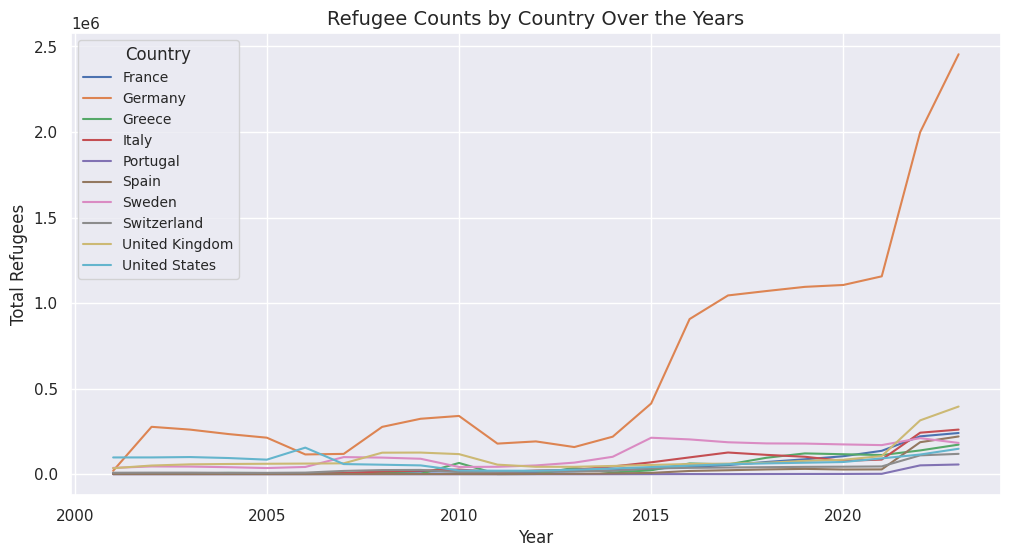

In [33]:
#group by country and year
grouped_data = df_orig.groupby(['country_name', 'year'])['total_refugees'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
for country in grouped_data['country_name'].unique():
    country_data = grouped_data[grouped_data['country_name'] == country]
    plt.plot(country_data['year'], country_data['total_refugees'], label=country)

# Add chart elements
plt.title("Refugee Counts by Country Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.grid(True)
plt.show()

### Boxplot (seaborn)

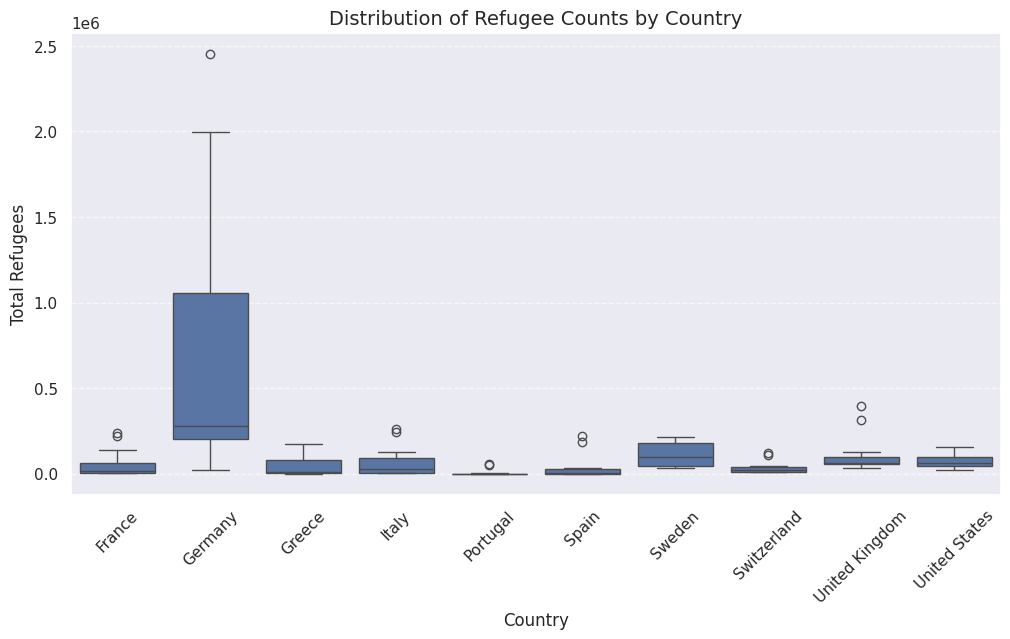

In [35]:
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orig, x='country_name', y='total_refugees')

# Add chart elements
plt.title("Distribution of Refugee Counts by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### Histogram (matplotlib) - BEARBEITEN

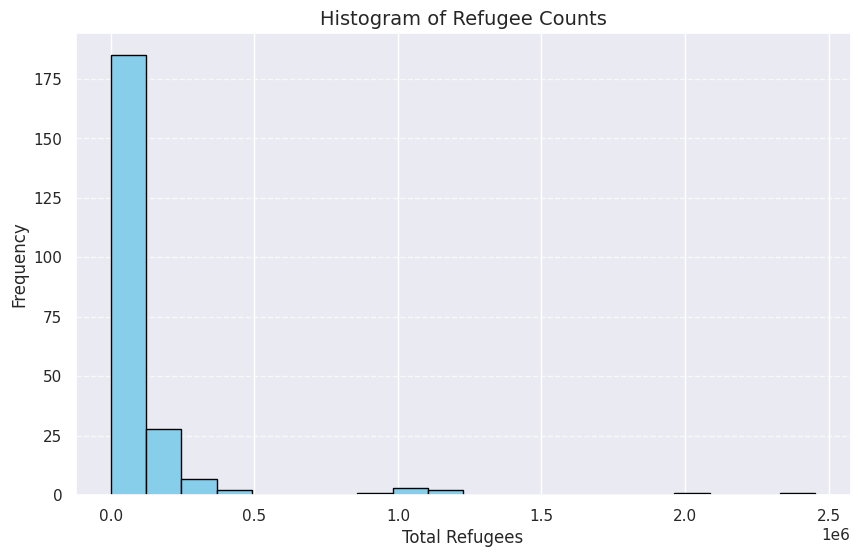

In [37]:
import matplotlib.pyplot as plt

# Create a histogram of total refugees
plt.figure(figsize=(10, 6))
plt.hist(df_orig['total_refugees'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Refugee Counts", fontsize=14)
plt.xlabel("Total Refugees", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Density plot (seaborn) - BEARBEITEN

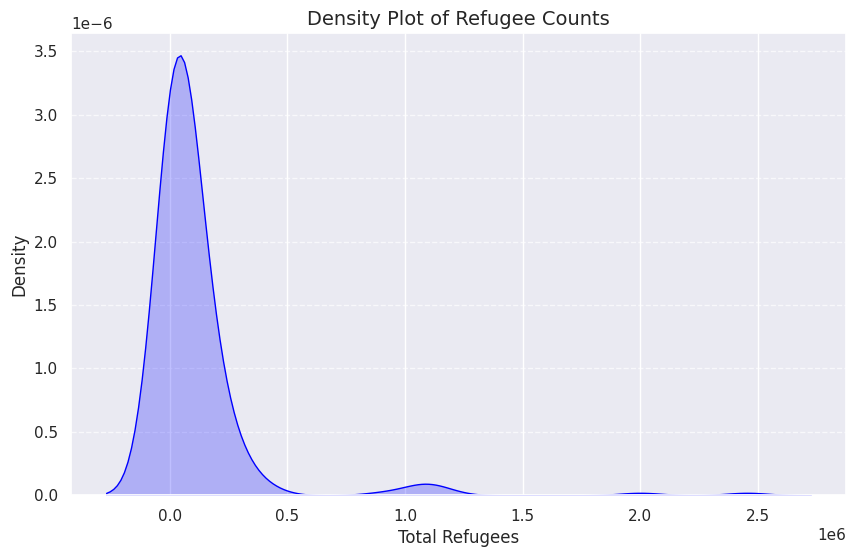

In [38]:
# Create a density plot for total refugees
plt.figure(figsize=(10, 6))
sns.kdeplot(df_orig['total_refugees'], shade=True, color='blue')
plt.title("Density Plot of Refugee Counts", fontsize=14)
plt.xlabel("Total Refugees", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Quantile-Quantile plot - LOOKS WRONG

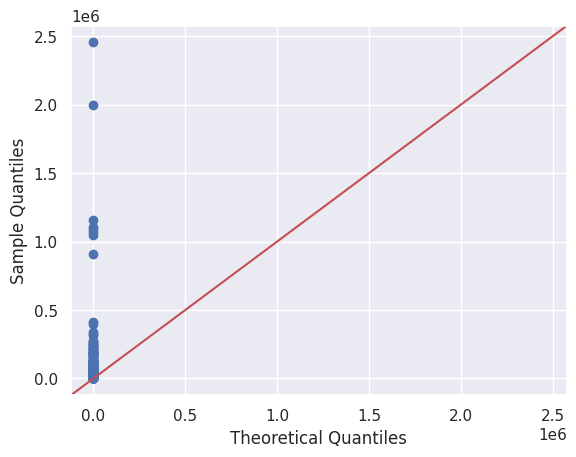

In [44]:
#create a qq plot
sm.qqplot(df_orig['total_refugees'], line ='45')
py.show()


### Barchart (matplotlib)

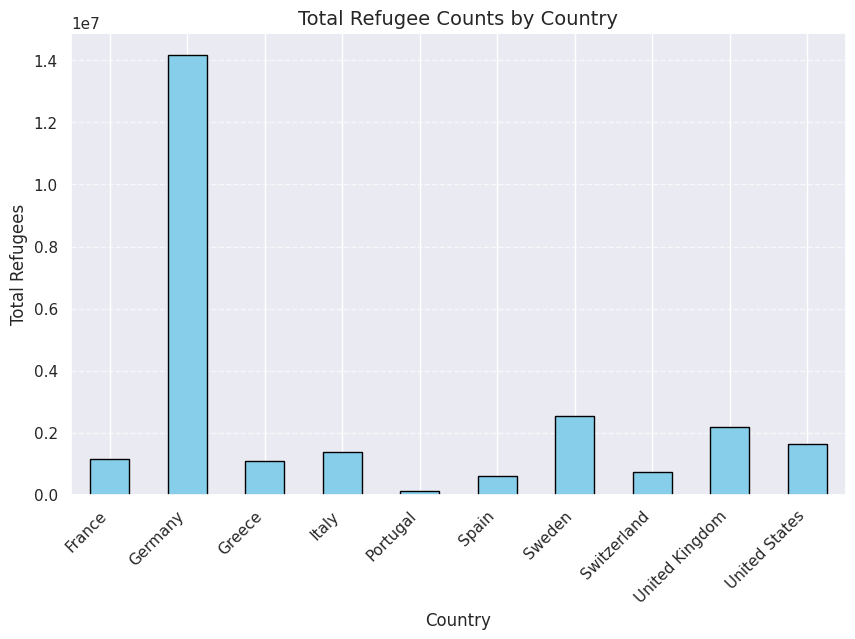

In [40]:
# Aggregate total refugees by country
refugee_counts_by_country = df_orig.groupby('country_name')['total_refugees'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
refugee_counts_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Refugee Counts by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Piechart (matplotlib)

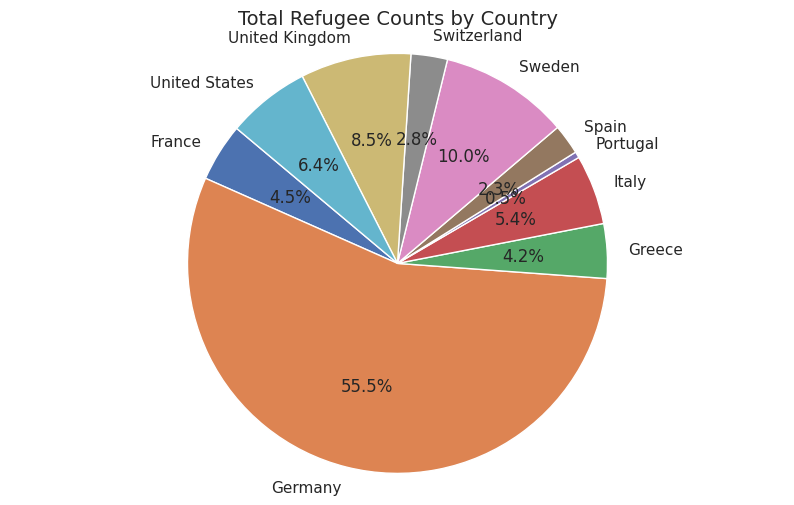

In [41]:
# Aggregate total refugees by country
refugee_counts_by_country = df_orig.groupby('country_name')['total_refugees'].sum()

#Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(refugee_counts_by_country, labels=refugee_counts_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Refugee Counts by Country", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

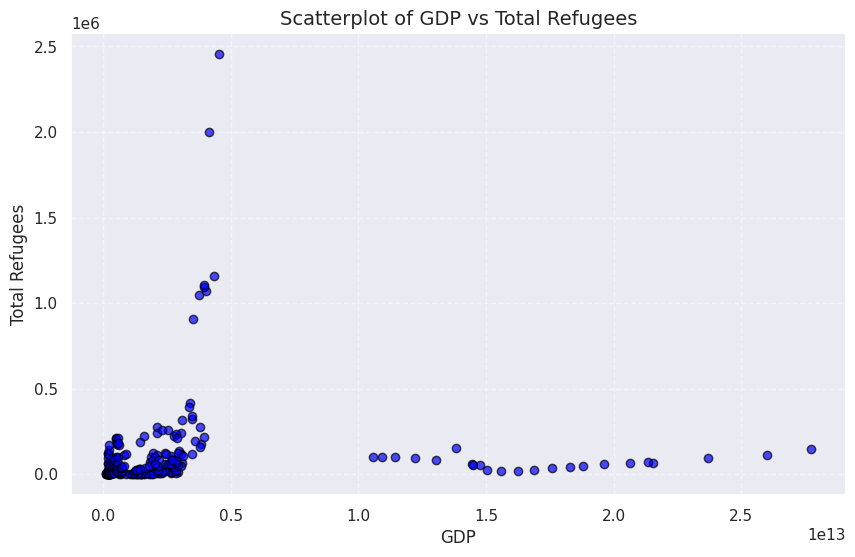

In [43]:
import matplotlib.pyplot as plt

# Create a scatterplot for GDP vs. Total Refugees
plt.figure(figsize=(10, 6))
plt.scatter(df_orig['gdp'], df_orig['total_refugees'], alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.title("Scatterplot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Scatterplot with regression line

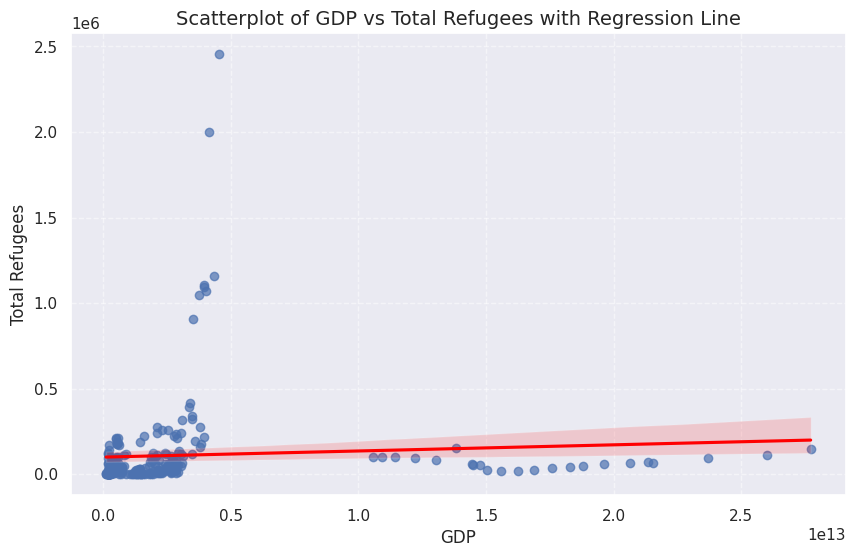

In [45]:

# Create a scatterplot with regression line for GDP vs Total Refugees
plt.figure(figsize=(10, 6))
sns.regplot(data=df_orig, x='gdp', y='total_refugees', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Add labels and title
plt.title("Scatterplot of GDP vs Total Refugees with Regression Line", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Scatterplot-matrix (seaborn)

<Figure size 1000x800 with 0 Axes>

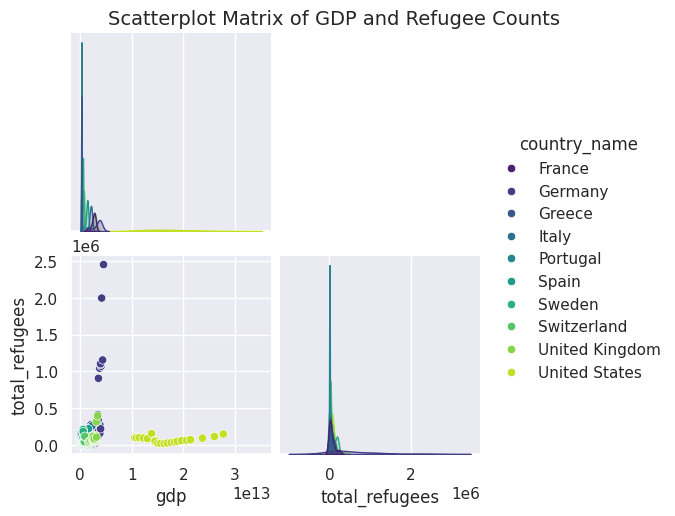

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot matrix
plt.figure(figsize=(10, 8))
sns.pairplot(df_orig, vars=['gdp', 'total_refugees'], hue='country_name', palette='viridis', corner=True)

# Show the plot
plt.suptitle("Scatterplot Matrix of GDP and Refugee Counts", y=1.02, fontsize=14)
plt.show()


### Hexagonal binning plot (matplotlib)

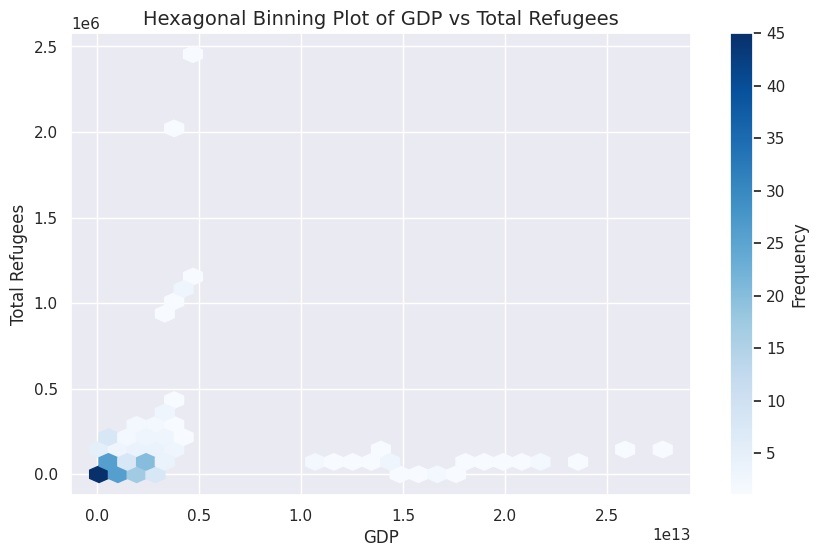

In [47]:
import matplotlib.pyplot as plt

# Create a hexbin plot for GDP vs. Total Refugees
plt.figure(figsize=(10, 6))
plt.hexbin(df_orig['gdp'], df_orig['total_refugees'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar
cb = plt.colorbar(label='Frequency')

# Add labels and title
plt.title("Hexagonal Binning Plot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.show()


### Correlation heatmap (seaborn) - THIS DOES NOT LOOK RIGHT

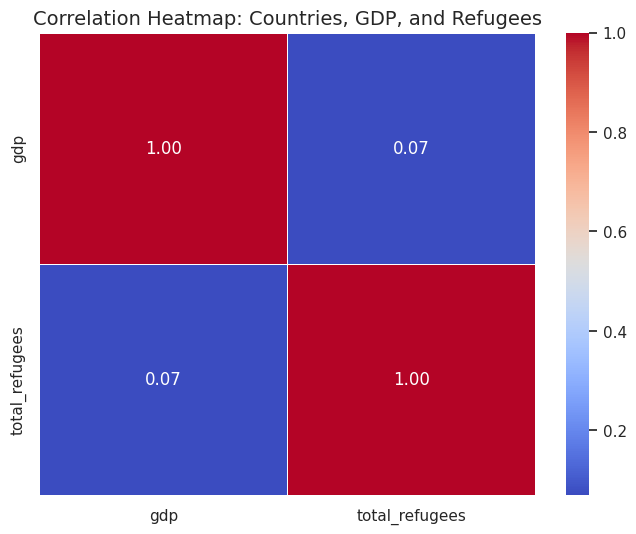

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to have countries as rows and their metrics as columns
pivoted_data = df_orig.pivot_table(index='country_name', values=['gdp', 'total_refugees'], aggfunc='sum')

# Calculate the correlation matrix
correlation_matrix = pivoted_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title("Correlation Heatmap: Countries, GDP, and Refugees", fontsize=14)
plt.show()



### Bubble plot (seaborn)

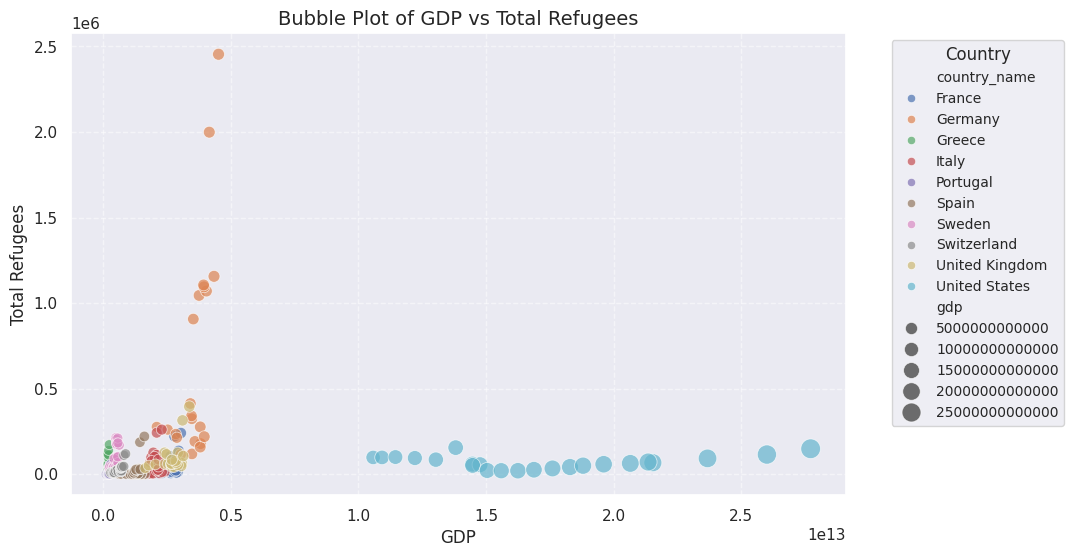

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bubble plot for GDP vs. Total Refugees, with bubble size proportional to GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orig, x='gdp', y='total_refugees', size='gdp', hue='country_name', sizes=(50, 200), alpha=0.7)

# Add labels and title
plt.title("Bubble Plot of GDP vs Total Refugees", fontsize=14)
plt.xlabel("GDP", fontsize=12)
plt.ylabel("Total Refugees", fontsize=12)
plt.legend(title="Country", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
